# Setup

## Imports

In [1]:
import magnet as mag

Running your code on a slow, boring CPU.
Make some money and buy yourself a GPU, will ya?

Pro Tip: If you're a poor old hag like me, use a cloud provider.


In [2]:
import torch

In [6]:
from captioner import hparams
from captioner.nlp import get_nlp
from captioner.hparams import (vocab_size, caption_idx, shuffle, hidden_size,
                               num_layers, rnn_type, learning_rate)
from captioner.data import get_training_dataloaders
from captioner.model import Model
from captioner.train import optimize

## Preparations

In [4]:
jtplot_style()

In [5]:
DIR_DATA /= 'COCO'
DIR_CHECKPOINTS = DIR_MAIN / 'checkpoints'

## Get SpaCy Ready

In [7]:
nlp = get_nlp('en_core_web_lg', vocab_size, DIR_CHECKPOINTS / 'vocab')

In [8]:
embedding_dim = nlp.vocab.vectors.shape[1]

## Load Data

In [ ]:
dataloader = get_training_dataloaders(DIR_DATA, caption_idx, shuffle)

In [8]:
x = next(iter(dataloader['val']))

In [9]:
feature_dim = x[0].shape[1]

# Create Model

In [10]:
model = Model(feature_dim, embedding_dim, hidden_size,
              num_layers, rnn_type, vocab_size).to(mag.device)

In [14]:
model.load_state_dict(torch.load(DIR_CHECKPOINTS / 'model.pt'))

# Train

In [11]:
optimizer = hparams.optimizer(model.parameters(), learning_rate)

In [12]:
losses = []

In [16]:
losses += optimize(model, optimizer, dataloader, nlp, vocab_size)

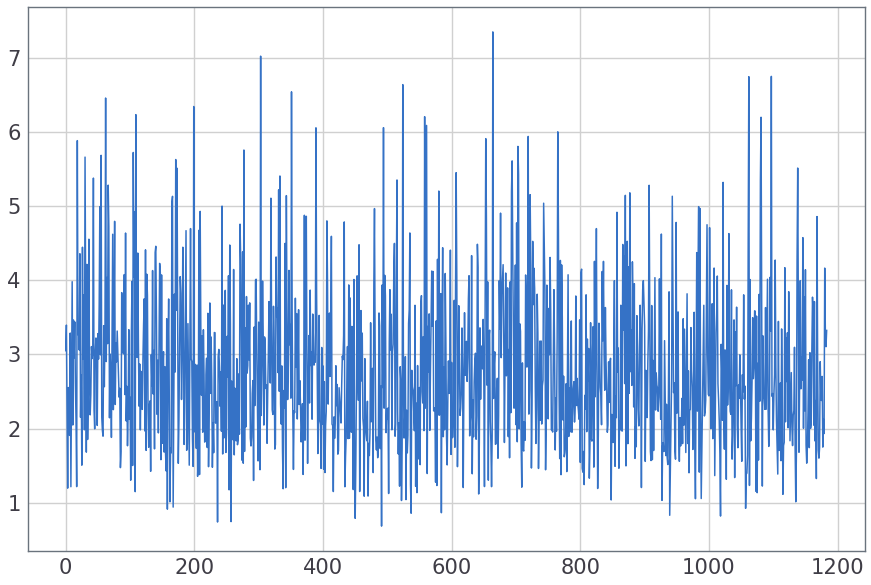

In [17]:
plot(losses)

In [18]:
torch.save(model.state_dict(), DIR_CHECKPOINTS / 'model.pt')